# Analysis of a given area data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

**<span style="color: red;">Chose a region, the list is below.</span>**

In [1]:
area='Piemonte'
# area names: Abruzzo | Basilicata | Calabria | Campania | Emilia-Romagna | 
#             Friuli Venezia Giulia |  Lazio | Liguria | Lombardia | Marche | 
#             Molise | P.A. Bolzano | P.A. Trento | Piemonte | Puglia | Sardegna | 
#             Sicilia | Toscana | Umbria | Valle d'Aosta | Veneto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

area_data=regional_data[regional_data.denominazione_regione==area].reset_index()
area_data=area_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colorDict={'ricoverati_con_sintomi':'lightgray', 'terapia_intensiva':'darkgray',
           'totale_ospedalizzati':'dimgray', 'isolamento_domiciliare':'brown', 
           'totale_positivi':'red','variazione_totale_positivi':' orange', 
           'nuovi_positivi':'olive', 'dimessi_guariti':'yellowgreen','deceduti':'black',
           'casi_da_sospetto_diagnostico':'fuchsia', 'casi_da_screening':'darkviolet',
           'totale_casi':'blue', 'tamponi':'green', 'casi_testati':'lime',
           'totale_positivi_corr':'red','totale_casi_corr':'blue',
           'casi_da_screening_diff14days':'deeppink',
           'casi_da_screening_diff28days':'deeppink',
           'totale_casi_diff14days': 'blue',
           'totale_casi_diff28days': 'blue',
           'casi_da_sospetto_diagnostico_diff28days': 'fuchsia',
           'totale_positiviD':'red','totale_positiviDD':'red',
           'totale_casiD':'blue','totale_casiDD':'blue',
           'totale_positivi_corrD':'red','totale_positivi_corrDD':'red',
           'totale_casi_corrD':'blue','totale_casi_corrDD':'blue'}
area_data.columns

Index(['index', 'dates', 'stato', 'codice_regione', 'denominazione_regione',
       'lat', 'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [3]:
import numpy as np # replacing 0 values with nan from 20201203 in the cols below
area_data['casi_da_sospetto_diagnostico'].replace(0,np.nan,inplace=True)
area_data['casi_da_screening'].replace(0,np.nan,inplace=True)

<br/>

# Definitions
**from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]**,
     
**<span style="color: red;">Legenda</span>**  about stocks and flows:  
    - stock($t$), quantity of day $t$;  
    - flow$[t_1,t_2]$, sum of the quantities from day $t_1$ to day $t_2$,  
with $[t_1,t_2]=\{x \in \mathbb{R}|t_1 \leq x \leq t_2\}$

   
**ricoverati_con_sintomi <span style="color: red;">[stock(t)]</span>**  
Ricoverati con sintomi | Hospitalised patients with symptoms  

**terapia_intensiva <span style="color: red;">[stock(t)]</span>**  
Ricoverati in terapia intensiva	| Intensive Care  
  
**totale_ospedalizzati <span style="color: red;">[stock(t)]</span>**  
Totale ospedalizzati | Total hospitalised patients  
  
**isolamento_domiciliare <span style="color: red;">[stock(t)]</span>**  
Persone in isolamento domiciliare | Home confinement  
  
**totale_positivi <span style="color: red;">[stock(t)]</span>**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) | Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi <span style="color: red;">[first difference of totale_positivi  (stock(t) - stock(t-1)]</span>**  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi <span style="color: red;">[first difference of totale_casi flow (flow[1,t] - flow[1,t-1], i.e., stock[t]]</span>**  
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) | News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti <span style="color: red;">[flow[1,t]]</span>**  
Persone dimesse guarite | Recovered  
  
**deceduti <span style="color: red;">[flow[1,t]]</span>**  
Persone decedute | Death  
  
**casi_da_sospetto_diagnostico <span style="color: red;">[flow[1,t]]</span>**  
Casi positivi al tampone emersi da attività clinica | Positive cases emerged from clinical activity  
  
**casi_da_screening <span style="color: red;">[flow[1,t]]</span>**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale | Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi <span style="color: red;">[flow[1,t]]</span>**  
Totale casi positivi | Total amount of positive cases  
  
**tamponi <span style="color: red;">[flow[1,t]]</span>**  
Totale tamponi - Tests performed  
  
**casi_testati <span style="color: red;">[flow[1,t]]</span>**  
Totale dei soggetti sottoposti al test | Total number of people tested    
  
  

summing stocks to produce a stock  
totale_positivi(t) **<span style="color: red">=</span>** ricoverati_con_sintomi(t) + terapia_intensiva(t) + isolamento_domiciliare(t)  
  
summing a stock and two flows to pruduce a flow (the stock acts as an addendum)  
totale_casi[1,t] **<span style="color: red">=</span>** totale_positivi(t) + dimessi_guariti[1,t] + deceduti[1,t] 
  
summing two flows to produce a flow  
totale_casi[1,t] **<span style="color: red">=</span>** casi_da_sospetto_diagnostico[1,t] + casi_da_screening[1,t]    

<br/>


# Data from the last three days  
<br/>



In [4]:
area

'Piemonte'

In [5]:
area_data[-3:][relevant_columns]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
525,2021-08-02,81,6,87,2467,2554,79,138,351858,11699,NaN,NaN,366111,5519759,2110406.0
526,2021-08-03,80,7,87,2517,2604,50,194,352001,11700,NaN,NaN,366305,5534209,2114429.0
527,2021-08-04,86,5,91,2634,2725,121,257,352137,11700,NaN,NaN,366562,5550096,2118484.0


### First differences  

In [6]:
area_data[relevant_columns].diff()[-3:]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
525,1 days,0.0,0.0,0.0,79.0,79.0,-19.0,-8.0,59.0,0.0,NaN,NaN,138.0,11074.0,2242.0
526,1 days,-1.0,1.0,0.0,50.0,50.0,-29.0,56.0,143.0,1.0,NaN,NaN,194.0,14450.0,4023.0
527,1 days,6.0,-2.0,4.0,117.0,121.0,71.0,63.0,136.0,0.0,NaN,NaN,257.0,15887.0,4055.0


<br/>

# Figure 1, using data as they are  
  
The introduction of 'casi_da_screening' profoundly modifies the 'totale_casi' count (a cumulative value) and – via 'isolamento_domiciliare' – also modifies the 'totale_positivi' count (a daily stock). Two reasons:   
  
(i) the overrepresentation of positive cases in the tested subjects is due to their characteristics (individuals with specific risk profiles);  
  
(ii) tracking cases via screening, we find asymptomatic positive persons who we were not accounting for in the first phase of the epidemic.

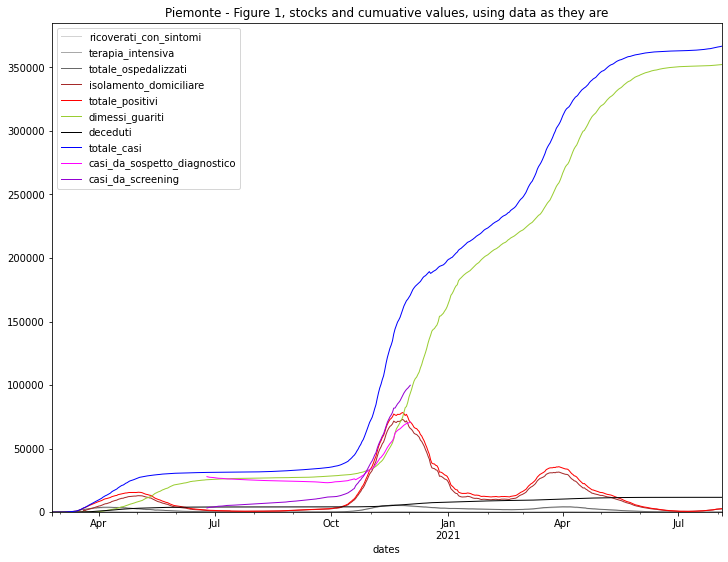

In [7]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['ricoverati_con_sintomi', 'terapia_intensiva',
                                     'totale_ospedalizzati','isolamento_domiciliare',
                                     'totale_positivi',
                                     'dimessi_guariti','deceduti',
                                     'totale_casi',
                                     'casi_da_sospetto_diagnostico','casi_da_screening'], 
                    title=
                    area+" - Figure 1, stocks and cumuative values, using data as they are",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

### Why `casi_da_sospetto_diagnostico` is not monotonic, if it is a cumulative value?

In [8]:
FIRST_CASI_SOSP_DIAGNOSTICO = area_data.casi_da_sospetto_diagnostico.first_valid_index()

Check that `casi_da_sospetto_diagnostico` and `casi_da_screening` sperfectly sum up to `totale_casi`:

In [9]:
(
    area_data.loc[FIRST_CASI_SOSP_DIAGNOSTICO:,'casi_da_sospetto_diagnostico']
    + area_data.loc[FIRST_CASI_SOSP_DIAGNOSTICO:,'casi_da_screening']
    == area_data.loc[FIRST_CASI_SOSP_DIAGNOSTICO:,'totale_casi']
).all()

False

This shows that **some cases have been gradually moved** from `casi_da_sospetto_diagnostico` to `casi_da_screening` during the period Jul - Oct.

<br/>

## Figure 1.1, paying attention to two curves plus one
  
Pay attention to the dynamic of the 'isolamento_domiciliare' curve and the 'casi_da_screening' one.  
  
We see a strong relation between them (not valid for all the regions). They are a **stock** and a **cumulative value**.  
  
Let us define a 14 days difference in 'casi_da_screening,' considering this value to approximate the **stock** of quarantine simultaneously present cases. Its dynamic is quite similar to that of the 'isolamento_domiciliare' **stock**. we name it 'casi_da_screening_diff14days'.

In [10]:
area_data['casi_da_screening_diff14days'] = area_data.casi_da_screening - \
                                             area_data.casi_da_screening.shift(14)

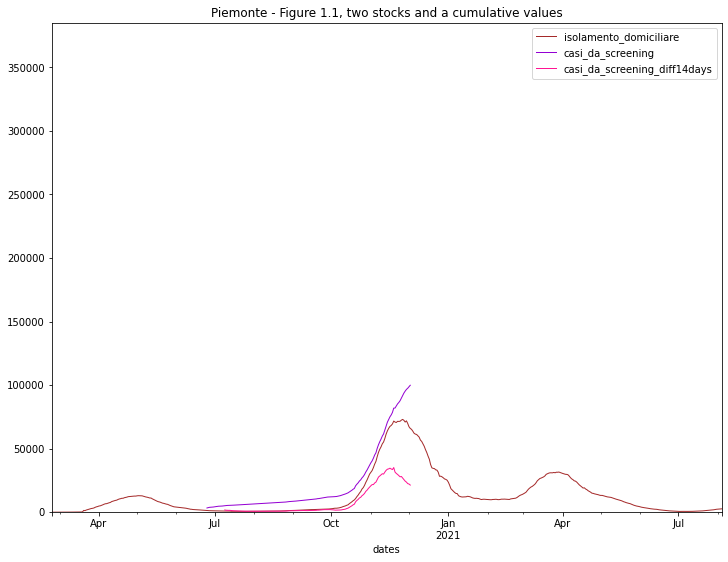

In [11]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['isolamento_domiciliare','casi_da_screening',
                                     'casi_da_screening_diff14days'], 
                    title=area+" - Figure 1.1, two stocks and a cumulative values",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

# The meaning of casi_da_screening_diff14days

To better grasp the meaning of `casi_da_screening_diff14days` let's compute the same difference for the `totale_casi` and compare it with the `totale_positivi`

In [12]:
area_data['totale_casi_diff14days'] = area_data.totale_casi - \
                                             area_data.totale_casi.shift(14)

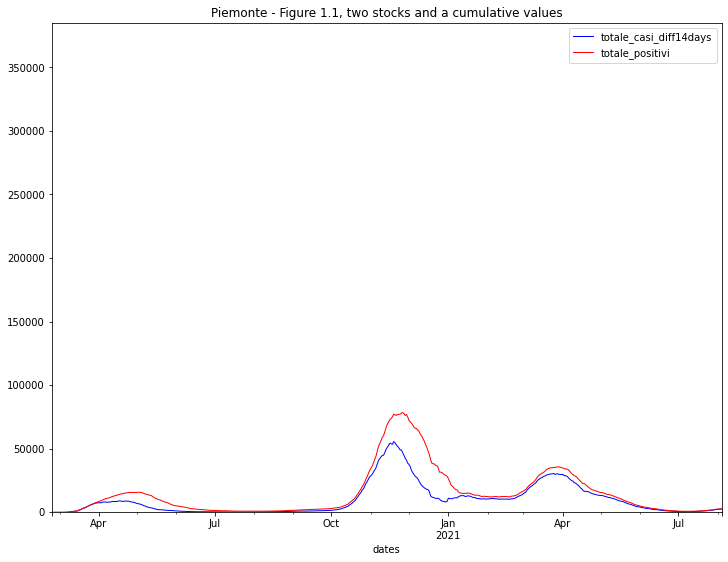

In [13]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['totale_casi_diff14days','totale_positivi'], 
                    title=area+" - Figure 1.1, two stocks and a cumulative values",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

Ok, it seems that `totale_casi_diff14days` represents a good approximation of `totale_positivi`.

Let see if we can do any better: let's try `totale_casi_diff28days`, taking the difference among 28 days

In [14]:
area_data['totale_casi_diff28days'] = area_data.totale_casi - \
                                             area_data.totale_casi.shift(28)

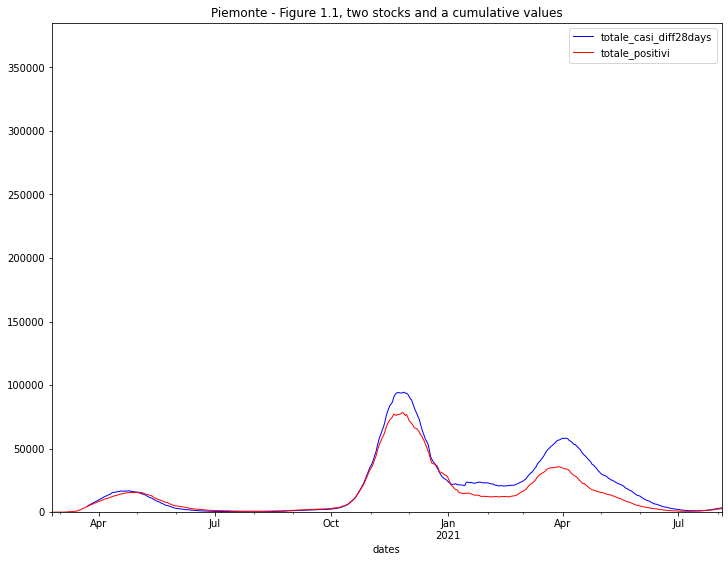

In [15]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['totale_casi_diff28days','totale_positivi'], 
                    title=area+" - Figure 1.1, two stocks and a cumulative values",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

**Much much better!**

We could make it more precise searching the time delta which minimize the `SMAPE` error among the two signals.

But for now, let's take `DT=28` as the time delta that we can use to obtain a good approximation of a daily stock, starting from a cumulative one:

`daily_stock(totale_casi, t) == totale_positivi(t)`

`daily_stock(totale_casi, t) ~ totale_casi(t) - totale_casi(t - DT)`

Hence: `totale_positivi(t) ~ totale_casi(t) - totale_casi(t - DT)`

Now we can yse this approximation to compute the daily stock from other cumulatives, e.g. the `casi_da_sospetto_diagnostico`, for which the daily stock is unavailable in the raw data:

Hence: 
```
totale_positivi_da_sospetto_diagnostico(t) ~ 
    casi_da_sospetto_diagnostico(t) - casi_da_sospetto_diagnostico(t - DT)
```

## Compute daily stocks at 28 days

In [16]:
area_data['casi_da_screening_diff28days'] = area_data.casi_da_screening - \
                                             area_data.casi_da_screening.shift(28)

area_data['casi_da_sospetto_diagnostico_diff28days'] = area_data.casi_da_sospetto_diagnostico - \
                                             area_data.casi_da_sospetto_diagnostico.shift(28)

As `casi_da_sospetto_diagnostico` decreases in the period Jul-Oct, we expect the differences to be negative:

In [17]:
len(area_data.loc[area_data.casi_da_sospetto_diagnostico_diff28days<0])

77

This just reflects the accounting problem in raw data, which lasts from Jul to Oct.

## Figure 1.2a-b, about stock data which are comparable over time, with two vertical scales  

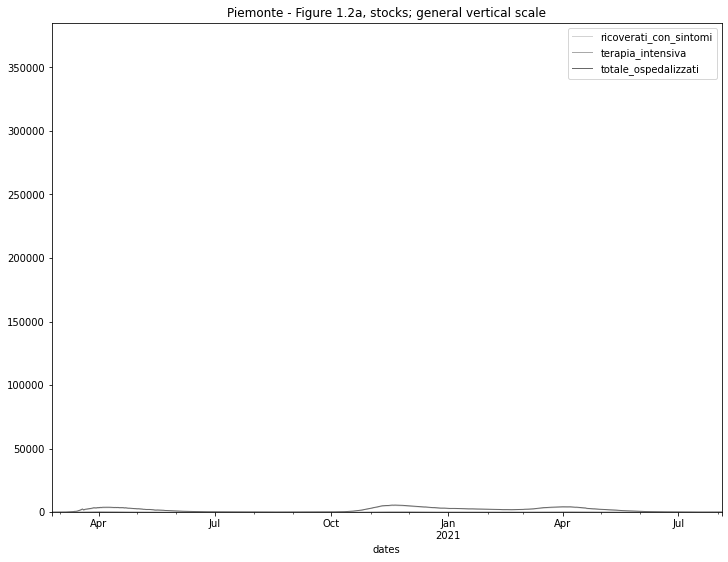

In [18]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.2a, stocks; general vertical scale",
                            color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

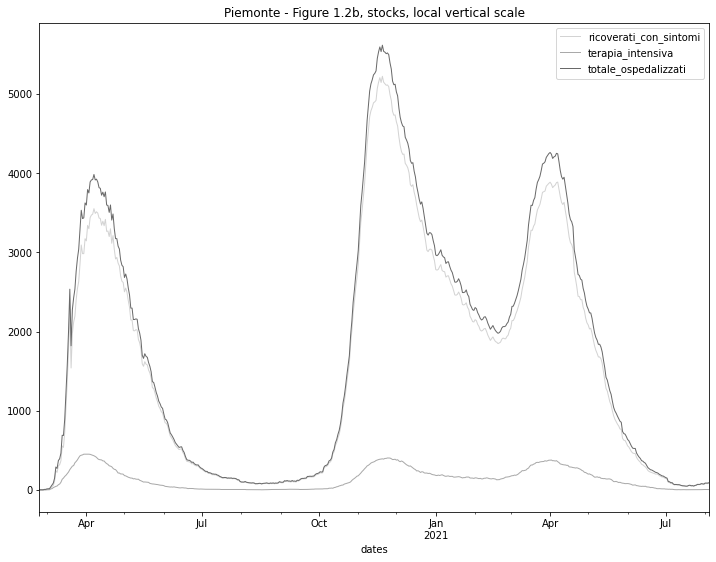

In [19]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.2b, stocks, local vertical scale",
                            color=colorDict,lw=1);

<br/>

## Figure 1.3, about a cumulative datum which is comparable over time

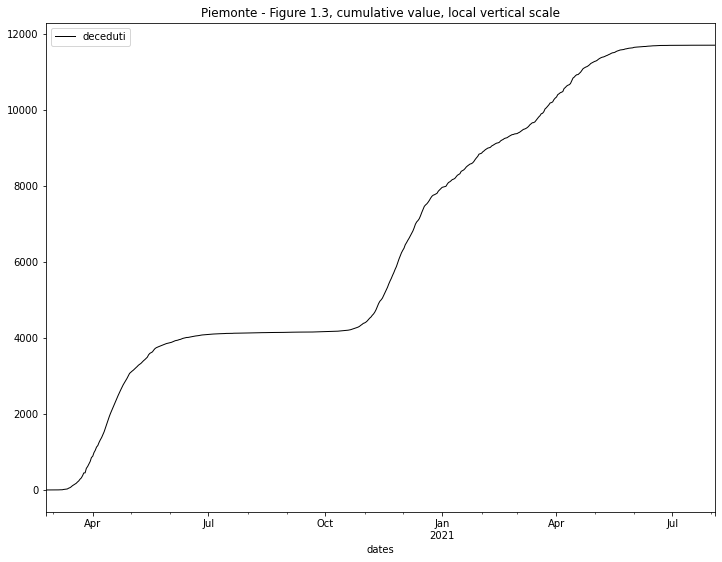

In [20]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['deceduti'], 
                            title=area+" - Figure 1.3, cumulative value, local vertical scale",
                            color=colorDict,lw=1);

<br/>

# Figure 2, trying to make the data comparable  
  
The data in Figure 1 are the published data, certainly correct ones, but quite problematic if we want to compare the current situation to April. The data in Figure 1 are the published data, undoubtedly correct, but quite complicated if we compare the current situation and April.  
  
In Fig. 1, we introduce 'casi_da_screening_diff14days' as an approximation of the quarantine simultaneously present cases.  

We can consistently correct the cumulative values of 'totale_casi' subtracting 'casi_da_screening', another cumulative value.

Nota Bene  
The results are not significant for all the regions.

In [21]:
area_data['totale_casi_corr']=area_data['totale_casi'] - \
                                  area_data['casi_da_screening']

In [22]:
area_data['totale_positivi_corr']=area_data['totale_positivi'] - \
                                  area_data['casi_da_screening_diff14days']

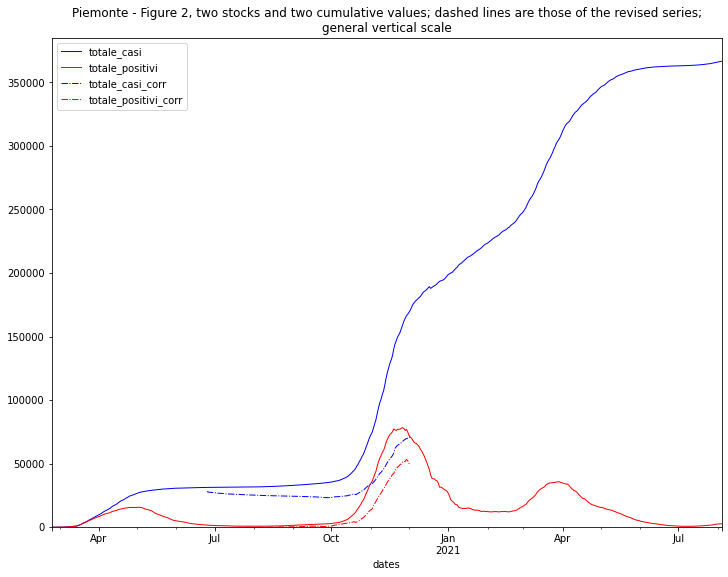

In [23]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['totale_casi','totale_positivi',
                                     'totale_casi_corr','totale_positivi_corr'],
                    title=area+" - Figure 2, two stocks and two cumulative values;"+
                               " dashed lines are those of the revised series;\n"+
                               "general vertical scale",
                    color=colorDict, lw=1,style=["-","-","-.","-."],
                    ylim=(0,1.05*max(area_data['totale_casi'])));

## DT=28

In [24]:
area_data['totale_positivi_corr']=area_data['totale_positivi'] - \
                                  area_data['casi_da_screening_diff28days']

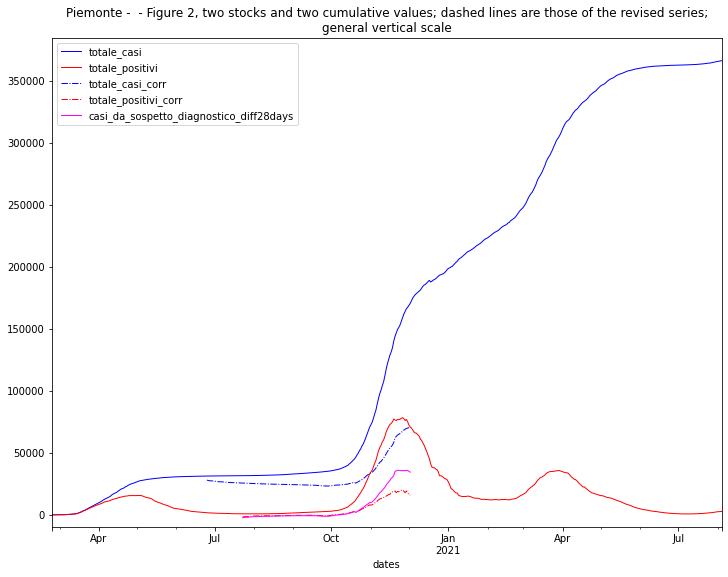

In [25]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['totale_casi','totale_positivi',
                                     'totale_casi_corr','totale_positivi_corr',
                                     'casi_da_sospetto_diagnostico_diff28days'],
                    title=area+" -  - Figure 2, two stocks and two cumulative values;"+
                               " dashed lines are those of the revised series;\n"+
                               "general vertical scale",
                    color=colorDict, lw=1,style=["-","-","-.","-."],
                    ylim=(-10000,1.05*max(area_data['totale_casi'])));

Notable result:

**the correction of `totale_positivi` with `casi_da_screening_diff28days` corresponds to the approx daily stock of `casi_da_sospetto_diagnostico`**

# NOTE: from now on we could use `casi_da_sospetto_diagnostico_diff28days` insead of `totale_casi_corr` as a better measure of daily stock

# TODO

In [26]:
# delay in diff
d=5
# final segment of length 
s=30

<br/>

## Figure 2.1, first differeces, with delay "d", of the series of Figure 2
    
The original series increases if these values are positive, more (highly positive), or less quickly.  
The original series decreases if these values are negative, more (highly negative), or less quickly.

In [27]:
area_data['totale_casiD']=area_data.totale_casi.diff(d)
area_data['totale_positiviD']=area_data.totale_positivi.diff(d)
area_data['totale_casi_corrD']=area_data.totale_casi_corr.diff(d)
area_data['totale_positivi_corrD']=area_data.totale_positivi_corr.diff(d)

area_data['totale_casiDD']=area_data.totale_casiD.diff()
area_data['totale_positiviDD']=area_data.totale_positiviD.diff()
area_data['totale_casi_corrDD']=area_data.totale_casi_corrD.diff()
area_data['totale_positivi_corrDD']=area_data.totale_positivi_corrD.diff()

area_data['dates2']=area_data.dates[-s:]

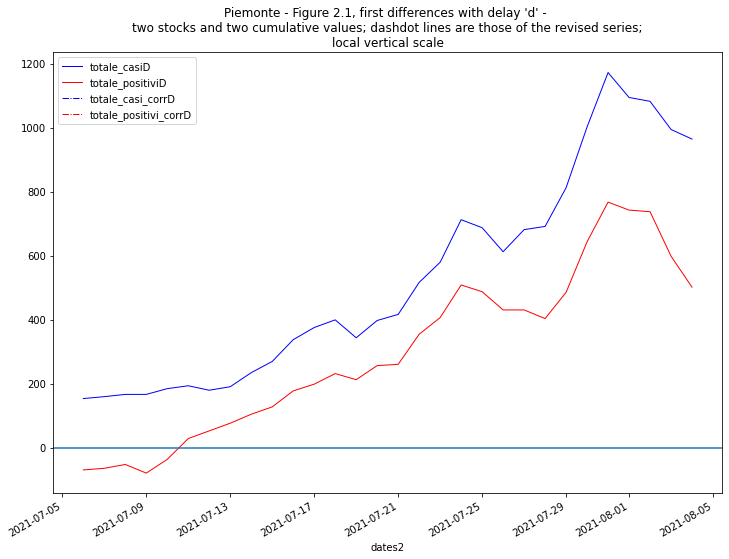

In [28]:
plt.rcParams['figure.figsize'] = [12, 9]
ax=area_data.plot.line(x='dates2',    y=['totale_casiD','totale_positiviD',
                                     'totale_casi_corrD','totale_positivi_corrD'],
                            title=area+" - Figure 2.1, first differences with delay 'd' - \n"+
                            "two stocks and two cumulative values;"+
                            " dashdot lines are those of the revised series;\n"+
                            "local vertical scale",
                            color=colorDict, lw=1,style=["-","-","-.","-."])
ax.axhline(y=0);

<br/>

## Figure 2.2, second differences, as first differences with delay "1", of the first differences with delay '1', of the series of Figure 2
  
Changes in the original series accelerate if these values are positive, more (highly positive), or less quickly.  
Changes in the original series decelerate if these values are negative, more (highly negative), or less quickly.

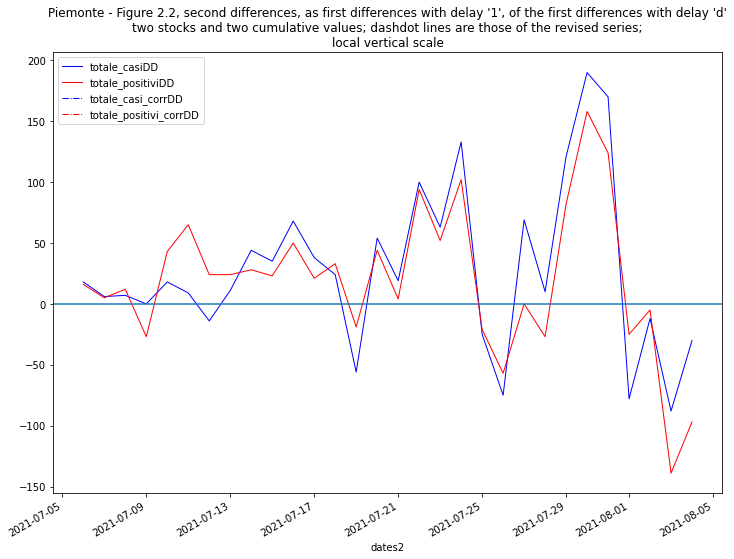

In [29]:
plt.rcParams['figure.figsize'] = [12, 9]
ax=area_data.plot.line(x='dates2',    y=['totale_casiDD','totale_positiviDD',
                                     'totale_casi_corrDD','totale_positivi_corrDD'],
                            title=area+" - Figure 2.2, second differences, as first differences"+
                            " with delay '1', of the first differences with delay 'd'\n"+
                            "two stocks and two cumulative values;"+
                            " dashdot lines are those of the revised series;\n"+
                            "local vertical scale",
                            color=colorDict, lw=1,style=["-","-","-.","-."])
ax.axhline(y=0);

<br/>

# Figure 3, showing 'tamponi' and 'casi_testati' with 'totale_casi' and 'casi_da_screening' (cumulative values)

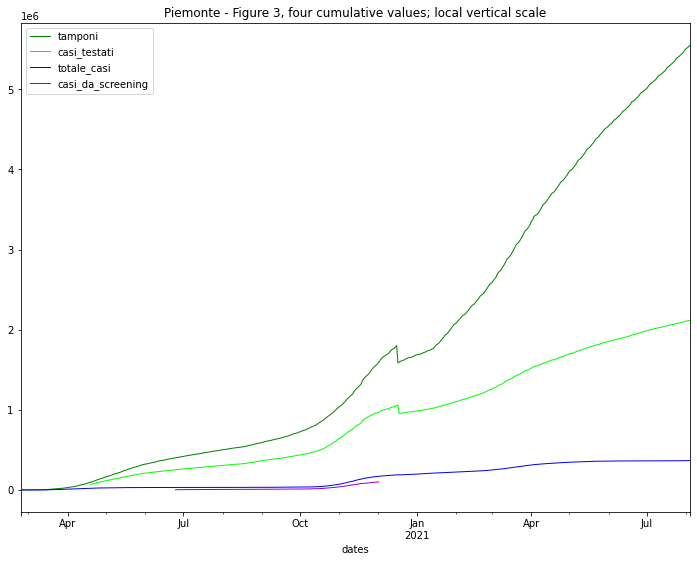

In [30]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot(x='dates',y=['tamponi', 'casi_testati',
                            'totale_casi','casi_da_screening'],
                  color=colorDict,lw=1,
                  title=area+" - Figure 3, four cumulative values; local vertical scale");

<br/>
  
# Ratios 'casi_da_screening' / 'casi_testati', with a delay  
  
We have: 
  
    - a description of the values of the last 20 days;
    
    - daily ratios in a given set of delays;
    
    - a graphical representation with delay 10 or 5.

In [31]:
area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1,2,3,7],[0,1,2]]

,casi_da_screening,tamponi,casi_testati
mean,NaN,5.400685e+06,2.081640e+06
std,NaN,9.371026e+04,2.281195e+04
min,NaN,5.249917e+06,2.045489e+06
max,NaN,5.550096e+06,2.118484e+06


In [32]:
mean_casi_da_screening=area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1],[0]].values[0][0]

In [33]:
mean_casi_testati=area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1],[2]].values[0][0]

In [34]:
format="\nLast 20 days ratio (ending %.10s) 'casi_da_screening' (20 days mean) "+\
        "/ \n'casi_testati' (20 days mean):\n\n %.2f%%"
print(format %
(area_data[-1:][['dates']].values[0][0],  100 * mean_casi_da_screening / mean_casi_testati) )


Last 20 days ratio (ending 2021-08-04) 'casi_da_screening' (20 days mean) / 
'casi_testati' (20 days mean):

 nan%


In [35]:
for delay in range (10,4,-1):
    print(area+" - Ratio 'casi_da_screening' %.10s / 'casi_testati' %.10s: %.2f%%" %
      (area_data[-1:][['dates']].values[0][0],
       area_data[-1-delay:-delay][['dates']].values[0][0],
       100*area_data[-1:][['casi_da_screening']].values[0][0] / \
    area_data[-1-delay:-delay][['casi_testati']].values[0][0]))

Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-25: nan%
Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-26: nan%
Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-27: nan%
Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-28: nan%
Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-29: nan%
Piemonte - Ratio 'casi_da_screening' 2021-08-04 / 'casi_testati' 2021-07-30: nan%


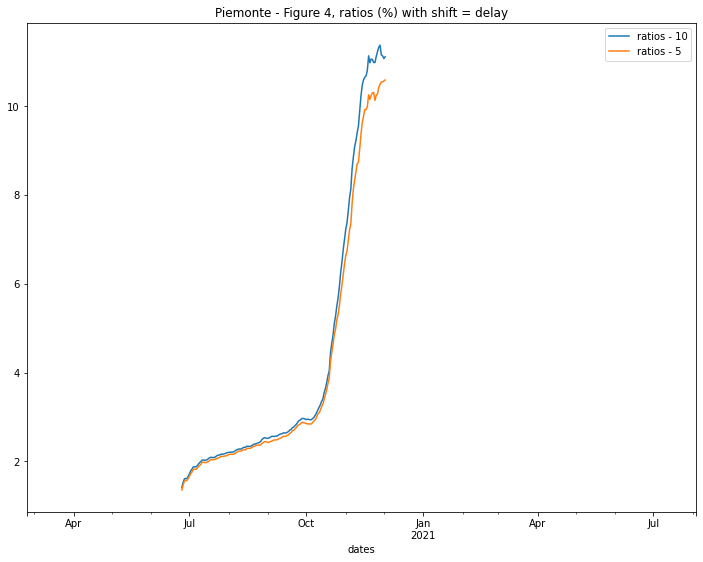

In [36]:
for delay in [10,5]:
    area_data['ratios - '+str(delay)]=100*area_data['casi_da_screening'] / \
    area_data['casi_testati'].shift(delay)

area_data.plot(x='dates',y=['ratios - '+str(10),'ratios - '+str(5)], 
    title=area+" - Figure 4, ratios (%) with shift = delay");